# Ensemble Methods, Random Forest, Cross Validation

# by Vivian Zeng 09/10/2020

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score

### 1. Load the the Heart Disease dataset. Print the first few rows. (5 pts)

In [4]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,male,typical_angina,145,233,higher_than_120,left_vent_hypertrophy,150,no,2.3,downsloping,0.0,fixed_defect,0
1,67,male,asymptomatic,160,286,lower_than_120,left_vent_hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,male,asymptomatic,120,229,lower_than_120,left_vent_hypertrophy,129,yes,2.6,flat,2.0,reversable_defect,1
3,37,male,non_anginal_pain,130,250,lower_than_120,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,female,atypical_angina,130,204,lower_than_120,left_vent_hypertrophy,172,no,1.4,upsloping,0.0,normal,0


### 2. Transform the data for modeling. (10 pts)
Create a data frame of the following variables: age, trestbps, chol, thalach, sex, slope, cp, and hd.
Transform the categorical variables to dummy variables (dropping one of the levels for each variable).
Print the first few rows of this new data frame.

In [4]:
cols=['age', 'trestbps', 'chol', 'thalach', 'sex', 'slope', 'cp', 'hd']

In [7]:
X_df = heart[cols]
X_df = pd.get_dummies(X_df, drop_first=True)
X_df.head()

,age,trestbps,chol,thalach,hd,sex_male,slope_flat,slope_upsloping,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina
0,63,145,233,150,0,1,0,0,0,0,1
1,67,160,286,108,1,1,1,0,0,0,0
2,67,120,229,129,1,1,1,0,0,0,0
3,37,130,250,187,0,1,0,0,0,1,0
4,41,130,204,172,0,0,0,1,1,0,0


In [8]:
X_df.groupby('hd').describe()

age                                                     trestbps  \
    count       mean       std   min    25%   50%   75%   max    count   
hd                                                                       
0   164.0  52.585366  9.511957  29.0  44.75  52.0  59.0  76.0    164.0   
1   139.0  56.625899  7.938416  35.0  52.00  58.0  62.0  77.0    139.0   

                ... cp_non_anginal_pain      cp_typical_angina            \
          mean  ...                 75%  max             count      mean   
hd              ...                                                        
0   129.250000  ...                 1.0  1.0             164.0  0.097561   
1   134.568345  ...                 0.0  1.0             139.0  0.050360   

                                       
         std  min  25%  50%  75%  max  
hd                                     
0   0.297629  0.0  0.0  0.0  0.0  1.0  
1   0.219477  0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

### 3. Create training testing sets. (10 pts)
Create a feature matrix and response (target) vector for heart disease, and store these as numpy arrays.
Split the data into training and test sets using a 70%/30% split, stratifying on heart disease.
Print the dimensions of the feature matrices and response vectors for both sets.

Creat response vector for heart disease(hd).

In [149]:
X = X_df.drop(['hd'], axis=1).values
y = heart.hd.values
print('Proportion with heart disease: {:.3f}'.format(y.mean()))

Proportion with heart disease: 0.459


Split the data into training and test sets using a 70%/30% split, stratifying on heart disease.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=7)

In [184]:
print('feature matrice training set dimensions:', X_train.shape)
print('feature matrice testing set dimensions:', X_test.shape)
print('response vector training set dimensions:', y_train.shape)
print('response vector testing set dimensions:', y_test.shape)

feature matrice training set dimensions: (212, 10)
feature matrice testing set dimensions: (91, 10)
response vector training set dimensions: (212,)
response vector testing set dimensions: (91,)


### 4. Fit the following models to the training set. For each model, calculate and display precision, recall, and the AUC ROC for the training and test sets. (25 pts)

4.1 Decision tree with max_depth = None.

In [185]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = None)

In [186]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training set: precision, recall, and the AUC ROC 

In [187]:
tree_preds = tree.predict(X_train)
tree_probs = tree.predict_proba(X_train)[:, 1]

In [188]:
print('Recall: ', recall_score(y_train, tree_preds))
print('Precision: ', precision_score(y_train, tree_preds))
print('ROC AUC: ', roc_auc_score(y_train, tree_probs))

Recall:  1.0
Precision:  1.0
ROC AUC:  1.0


Test set: precision, recall, and the AUC ROC

In [189]:
tree_preds = tree.predict(X_test)
tree_probs = tree.predict_proba(X_test)[:, 1]

In [190]:
print('Recall: ', recall_score(y_test, tree_preds))
print('Precision: ', precision_score(y_test, tree_preds))
print('ROC AUC: ', roc_auc_score(y_test, tree_probs))

Recall:  0.6190476190476191
Precision:  0.6190476190476191
ROC AUC:  0.6462585034013606


4.2 Random forests with max_depth = 1 and 100 trees (number of estimators).

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 100, max_depth=1, random_state=7)

In [194]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

Training set: precision, recall, and the AUC ROC

In [195]:
rf_preds = rf.predict(X_train)
rf_probs = rf.predict_proba(X_train)[:, 1]

In [196]:
print('Recall: ', recall_score(y_train, rf_preds))
print('Precision: ', precision_score(y_train, rf_preds))
print('ROC AUC: ', roc_auc_score(y_train, rf_probs))

Recall:  0.6288659793814433
Precision:  0.7439024390243902
ROC AUC:  0.8308381891528464


Test set: precision, recall, and the AUC ROC

In [197]:
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

In [198]:
print('Recall: ', recall_score(y_test, rf_preds))
print('Precision: ', precision_score(y_test, rf_preds))
print('ROC AUC: ', roc_auc_score(y_test, rf_probs))

Recall:  0.6904761904761905
Precision:  0.7631578947368421
ROC AUC:  0.8600583090379009


4.3 Gradient Boosted Decision Tree with a learning rate of 5 and 100 trees stumps (number of estimators).

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=5, n_estimators = 100, random_state=7)

In [200]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training set: precision, recall, and the AUC ROC

In [201]:
gb_preds = gb.predict(X_train)
gb_probs = gb.predict_proba(X_train)[:, 1]

In [202]:
print('Recall: ', recall_score(y_train, gb_preds))
print('Precision: ', precision_score(y_train, gb_preds))
print('ROC AUC: ', roc_auc_score(y_train, gb_probs))

Recall:  0.4639175257731959
Precision:  0.4838709677419355
ROC AUC:  0.5100851636037652


Test set: precision, recall, and the AUC ROC

In [203]:
gb_preds = gb.predict(X_test)
gb_probs = gb.predict_proba(X_test)[:, 1]

In [204]:
print('Recall: ', recall_score(y_test, gb_preds))
print('Precision: ', precision_score(y_test, gb_preds))
print('ROC AUC: ', roc_auc_score(y_test, gb_probs))

Recall:  0.5
Precision:  0.5526315789473685
ROC AUC:  0.5801749271137027


4.4 Bagging with Decisions trees with max_features = .7.

In [205]:
from sklearn.tree import DecisionTreeClassifier
bg=RandomForestClassifier(max_features = .7, random_state=7)

In [206]:
bg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

Training set: precision, recall, and the AUC ROC

In [207]:
bg_preds = bg.predict(X_train)
bg_probs = bg.predict_proba(X_train)[:, 1]

In [208]:
print('Recall: ', recall_score(y_train, bg_preds))
print('Precision: ', precision_score(y_train, bg_preds))
print('ROC AUC: ', roc_auc_score(y_train, bg_probs))

Recall:  1.0
Precision:  1.0
ROC AUC:  0.9999999999999999


Test set: precision, recall, and the AUC ROC

In [209]:
bg_preds = bg.predict(X_test)
bg_probs = bg.predict_proba(X_test)[:, 1]

In [210]:
print('Recall: ', recall_score(y_test, bg_preds))
print('Precision: ', precision_score(y_test, bg_preds))
print('ROC AUC: ', roc_auc_score(y_test, bg_probs))

Recall:  0.7857142857142857
Precision:  0.8048780487804879
ROC AUC:  0.8790087463556852


### 5. Plot the feature importance of the fitted Random Forest model from (4). (10 pts)

In [211]:
#feature_names=X_df.columns[1:]
#plt.barh(feature_names, rf.feature_importances_)

In [212]:
importances = rf.feature_importances_

In [213]:
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

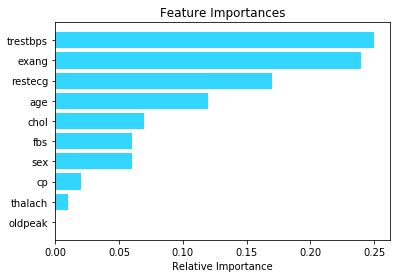

In [214]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#33D6FF', align='center')
plt.yticks(range(len(indices)), heart.columns[indices])
plt.xlabel('Relative Importance')

### 6. Fit the random forest model again, but this time optimize the model by choosing better tuning parameters. Try a grid of possible values for max_depth and number of trees. You may use any metric to select the best model. Calculate and print precision, recall and AUC ROC for the training and testing sets. (20 pts) Hint: You can use either a validations set, cross-validation, or OOB error to select the best tuning parameters.

In [217]:
best_oob_score = 0
trees = [10, 50, 100, 200, 300, 400, 500]
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for tree in trees:
    for depth in depths:
        rf = RandomForestClassifier(n_estimators=tree, max_features='sqrt', max_depth=depth, oob_score=
True)
        rf.fit(X_train, y_train)
        if rf.oob_score_ > best_oob_score:
            best_model = (tree, depth)
            best_oob_score = rf.oob_score_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

In [218]:
print('Best model (trees, max_depth): ', best_model)

Best model (trees, max_depth):  (300, 5)


In [223]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 300, max_depth=5, random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

Training set: precision, recall and AUC ROC

In [221]:
rf_preds = rf.predict(X_train)
rf_probs = rf.predict_proba(X_train)[:, 1]

In [222]:
print('Recall: ', recall_score(y_train, rf_preds))
print('Precision: ', precision_score(y_train, rf_preds))
print('ROC AUC: ', roc_auc_score(y_train, rf_probs))

Recall:  0.8865979381443299
Precision:  0.9052631578947369
ROC AUC:  0.9705064993276558


Test set: precision, recall and AUC ROC

In [224]:
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

In [225]:
print('Recall: ', recall_score(y_test, rf_preds))
print('Precision: ', precision_score(y_test, rf_preds))
print('ROC AUC: ', roc_auc_score(y_test, rf_probs))

Recall:  0.7857142857142857
Precision:  0.7674418604651163
ROC AUC:  0.8882410106899903


### 7. Plot the feature importance of the fitted Random Forest model from (6). (10 pts)

Text(0.5, 0, 'Relative Importance')

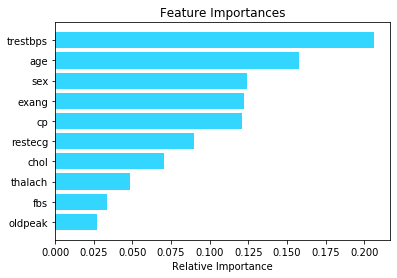

In [226]:
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#33D6FF', align='center')
plt.yticks(range(len(indices)), heart.columns[indices])
plt.xlabel('Relative Importance')

### 8.Write a sentence or two describing the process you used to choose the parameters in (6). (5 pts)

For CV, I limited the depth no more than the feature numbers and setup the tree numbers from 10 to 500 considering my computational resources. I also used the OOB error learnt in this week to select the best tuning parameters, which are 300 trees and 5 max_deepth.

### 9.Write a few sentences discussing the differences in the performance of these models. Can you explain why they are different? Which model would you prefer, and how does it depend on how it's used? (5 pts)

Both of the two models rank the trestbps at the first place, but with very different orders and weights for other features. The main reason is due to the difference of parameters of trees and max_deepth. I won't select the first model since the max_deepth is just 1, and the scores are relatively low. I prefer the second one because of it is based on the optimization from CV with higher scores. For example, in case of trying to diagnose if a person has heart disease risks by only reading trestbps, age, fbs information,  the physician may weight trestbps more than age, and put the evaluation mainly based on trestbps and age data. 

In [5]:
df = heart[['age', 'trestbps', 'chol', 'thalach', 'sex', 'slope', 'cp', 'hd']] 
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,trestbps,chol,thalach,hd,sex_male,slope_flat,slope_upsloping,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina
0,63,145,233,150,0,1,0,0,0,0,1
1,67,160,286,108,1,1,1,0,0,0,0
2,67,120,229,129,1,1,1,0,0,0,0
3,37,130,250,187,0,1,0,0,0,1,0
4,41,130,204,172,0,0,0,1,1,0,0


In [6]:
y = df['hd'].values
X = df.drop('hd', axis=1)
var_names = X.columns
X = X.values

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=2020)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 10)
(91, 10)
(212,)
(91,)


In [13]:
dtree = DecisionTreeClassifier(max_depth=None)
rf = RandomForestClassifier(max_depth=1, max_features=.1, n_estimators=100) 
gbdt = GradientBoostingClassifier(learning_rate=5, n_estimators=100)
bag = BaggingClassifier(max_features=.7)

In [14]:
# Initialize lists to hold metrics:
models = [dtree, rf, gbdt, bag]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosted Tree', 'Bagging']
train_auc = []
test_auc = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []

In [16]:
for m in models:
    m.fit(X_train, y_train)
    train_preds = m.predict(X_train)
    test_preds = m.predict(X_test) 
    train_precision.append(precision_score(y_train, train_preds)) 
    test_precision.append(precision_score(y_test, test_preds)) 
    train_recall.append(recall_score(y_train, train_preds)) 
    test_recall.append(recall_score(y_test, test_preds)) 
    train_auc.append(roc_auc_score(y_train, train_preds)) 
    test_auc.append(roc_auc_score(y_test, test_preds))

In [17]:
pd.DataFrame({'model':model_names,
              'precision_train':train_precision,
              'precision_test':test_precision,
              'recall_train':train_recall,
              'recall_test':test_recall,
              'auc_train':train_auc,
              'auc_test':test_auc})

,model,precision_train,precision_test,recall_train,recall_test,auc_train,auc_test
0,Decision Tree,1.000000,0.700000,1.000000,0.666667,1.000000,0.710884
1,Random Forest,0.837838,0.764706,0.639175,0.619048,0.767414,0.727891
2,Gradient Boosted Tree,0.333333,0.285714,0.092784,0.095238,0.468131,0.445578
3,Bagging,1.000000,0.717949,0.958763,0.666667,0.979381,0.721088


<BarContainer object of 10 artists>

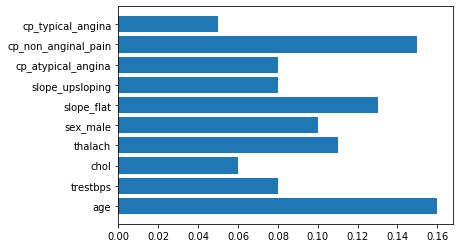

In [18]:
 plt.barh(var_names, rf.feature_importances_)

In [19]:
depths = [1, 2, 3, 4, 5, 6]
ntrees = [100, 200, 500, 1000]
out_depth = []
out_ntree = []
out_error = []
for depth in depths: 
    for ntree in ntrees:
        rf = RandomForestClassifier(max_depth=depth,
                                    max_features=.1,
                                    n_estimators=ntree, 
                                    oob_score=True)
        rf.fit(X_train, y_train)
        out_depth.append(depth)
        out_ntree.append(ntree)
        out_error.append(1 - rf.oob_score_)

In [20]:
results = pd.DataFrame({'depth':out_depth, 'ntrees':out_ntree, 'oob_error':out_error})
results

,depth,ntrees,oob_error
0,1,100,0.250000
1,1,200,0.254717
2,1,500,0.278302
3,1,1000,0.250000
4,2,100,0.240566
5,2,200,0.235849
6,2,500,0.226415
7,2,1000,0.240566
8,3,100,0.226415
9,3,200,0.221698


In [21]:
 # best model:
best_row = np.argmin(results['oob_error'].values)
results.iloc[best_row, :]

depth          4.000000
ntrees       500.000000
oob_error      0.207547
Name: 14, dtype: float64

In [23]:
best_rf = RandomForestClassifier(max_depth=results.depth[best_row], n_estimators=results.ntrees[best_row])
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500)

In [24]:
train_preds = best_rf.predict(X_train)
test_preds = best_rf.predict(X_test)
print('Training precision: ', precision_score(y_train, train_preds))
print('Testing precision: ', precision_score(y_test, test_preds))
print('Training recall: ', recall_score(y_train, train_preds))
print('Testing recall: ', recall_score(y_test, test_preds))
print('Training ROC AUC: ', roc_auc_score(y_train, train_preds))
print('Testing ROC AUC: ', roc_auc_score(y_test, test_preds))

Training precision:  0.8602150537634409
Testing precision:  0.6511627906976745
Training recall:  0.8247422680412371
Testing recall:  0.6666666666666666
Training ROC AUC:  0.8558493948901837
Testing ROC AUC:  0.6802721088435374


<BarContainer object of 10 artists>

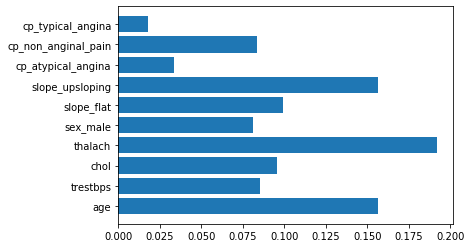

In [25]:
 plt.barh(var_names, best_rf.feature_importances_)